#Projeto Machine Learning
- Santander Coders 2024

-------------------

Integrantes:
- Gabriel Alvarenga
- Gabriel de Morais Vilarinho
- Marcel Cleres
- Gabriele Mendes



## Customer Churn Prediction 2020

Dataset proviniente da competição do Kaggle (https://www.kaggle.com/c/customer-churn-prediction-2020/overview)

A competição trata da previsão de se um cliente mudará de provedor de telecomunicações, aou seja, irá dar "churn".

O conjunto de dados de treinamento contém 4250 registros. Cada registro contém 19 características e 1 variável booleana "churn", que indica a classe da amostra. As 19 características de entrada e 1 variável alvo são:

- **"state"**: string. Código de 2 letras do estado dos EUA de residência do cliente.
- **"account_length"**: numérico. Número de meses que o cliente está com o provedor de telecomunicações atual.
- **"area_code"**: string="area_code_AAA" onde AAA = código de área de 3 dígitos.
- **"international_plan"**: (sim/não). O cliente possui plano internacional.
- **"voice_mail_plan"**: (sim/não). O cliente possui plano de correio de voz.
- **"number_vmail_messages"**: numérico. Número de mensagens de correio de voz.
- **"total_day_minutes"**: numérico. Total de minutos de chamadas durante o dia.
- **"total_day_calls"**: numérico. Total de chamadas durante o dia.
- **"total_day_charge"**: numérico. Total de cobrança de chamadas durante o dia.
- **"total_eve_minutes"**: numérico. Total de minutos de chamadas durante a tarde.
- **"total_eve_calls"**: numérico. Total de chamadas durante a tarde.
- **"total_eve_charge"**: numérico. Total de cobrança de chamadas durante a tarde.
- **"total_night_minutes"**: numérico. Total de minutos de chamadas durante a noite.
- **"total_night_calls"**: numérico. Total de chamadas durante a noite.
- **"total_night_charge"**: numérico. Total de cobrança de chamadas durante a noite.
- **"total_intl_minutes"**: numérico. Total de minutos de chamadas internacionais.
- **"total_intl_calls"**: numérico. Total de chamadas internacionais.
- **"total_intl_charge"**: numérico. Total de cobrança de chamadas internacionais.
- **"number_customer_service_calls"**: numérico. Número de chamadas para o serviço de atendimento ao cliente.
- **"churn"**: (sim/não). Churn do cliente - variável alvo.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#test = pd.read_csv("/content/drive/MyDrive/Santander Coders/Machine Learn 1/test.csv")
treino = pd.read_csv("/content/drive/MyDrive/Santander Coders/Machine Learn 1/train.csv")


In [ ]:
print(treino.shape)
#print(test.shape)

(4250, 20)
(750, 20)


In [ ]:
treino

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,area_code_415,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,WV,73,area_code_408,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,NC,75,area_code_408,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no


In [ ]:
treino.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [ ]:
treino.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


## EDA

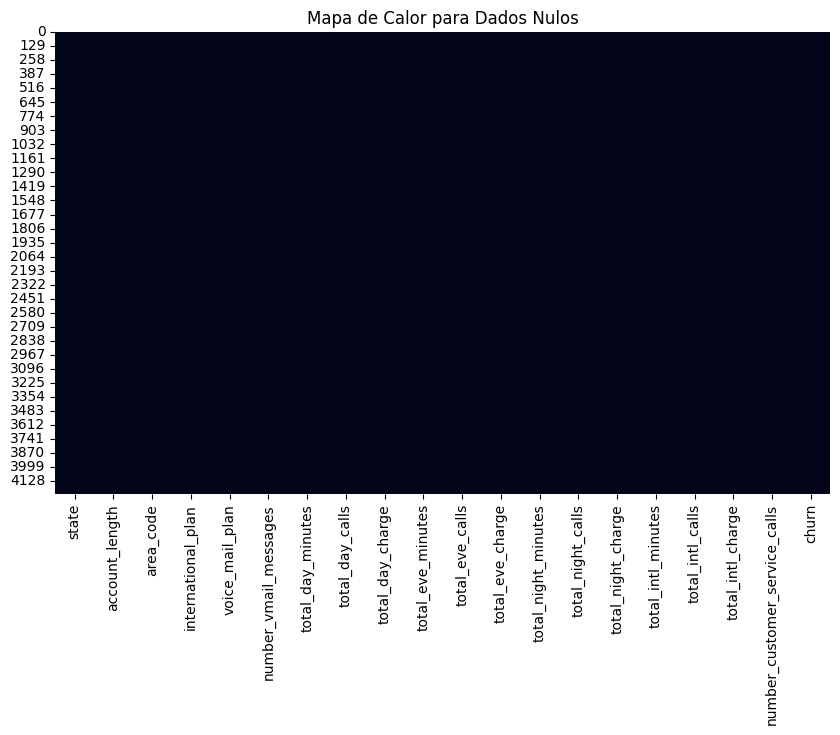

In [ ]:
# Criar um heatmap para destacar os dados nulos
plt.figure(figsize=(10, 6))
sns.heatmap(treino.isnull(), cbar=False)
plt.title('Mapa de Calor para Dados Nulos')
plt.show()

Text(0, 0.5, 'Frequencia')

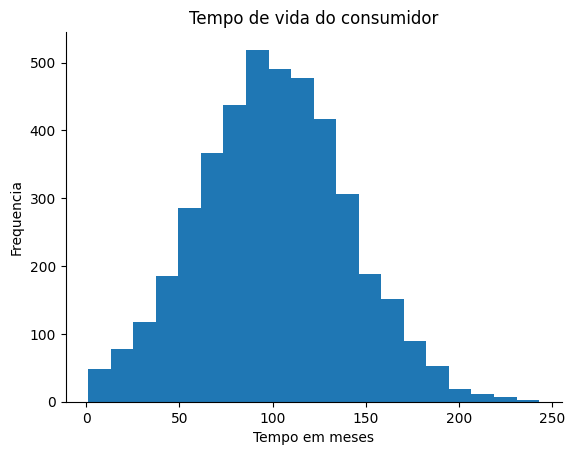

In [ ]:

from matplotlib import pyplot as plt
treino['account_length'].plot(kind='hist', bins=20, title='Tempo de vida do consumidor')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Adicionar rótulos aos eixos x e y
plt.xlabel('Tempo em meses')
plt.ylabel('Frequencia')

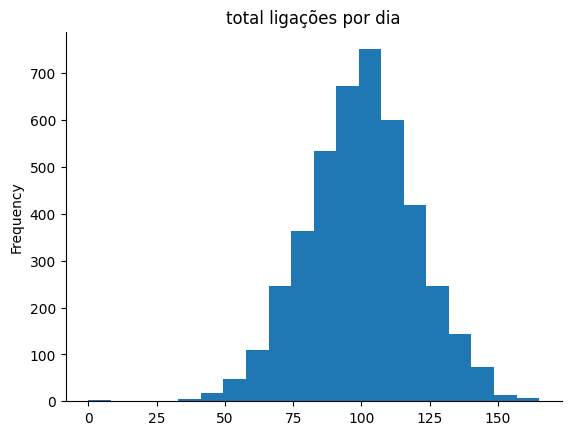

In [ ]:
from matplotlib import pyplot as plt
treino['total_day_calls'].plot(kind='hist', bins=20, title='total ligações por dia')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Adicionar rótulos aos eixos x e y
plt.xlabel('quantidades ')
plt.ylabel('Frequencia')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Gerar dados aleatórios para os histogramas
data1 = np.random.normal(loc=0, scale=1, size=1000)
data2 = np.random.normal(loc=2, scale=1.5, size=1000)
data3 = np.random.normal(loc=-2, scale=0.5, size=1000)

# Configurar o layout dos subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plotar os histogramas
axs[0].hist(data1, bins=30, color='blue', alpha=0.7)
axs[0].set_title('ligaçoes dia')

axs[1].hist(data2, bins=30, color='green', alpha=0.7)
axs[1].set_title('ligações tarde')

axs[2].hist(data3, bins=30, color='red', alpha=0.7)
axs[2].set_title('ligacoes noite')

# Adicionar título geral
plt.suptitle('Histogramas lado a lado')

# Mostrar os histogramas
plt.show()


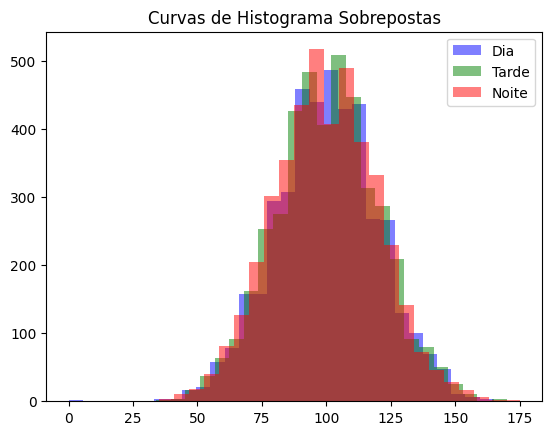

In [ ]:
# Plotar os histogramas sobrepostos
plt.hist(treino.total_day_calls, bins=30, density=False, color='blue', alpha=0.5, label='Dia')
plt.hist(treino.total_eve_calls, bins=30, density=False, color='green', alpha=0.5, label='Tarde')
plt.hist(treino.total_night_calls, bins=30, density=False, color='red', alpha=0.5, label='Noite')

# Adicionar legenda
plt.legend()

# Adicionar título
plt.title('Curvas de Histograma Sobrepostas')

# Mostrar o gráfico
plt.show()

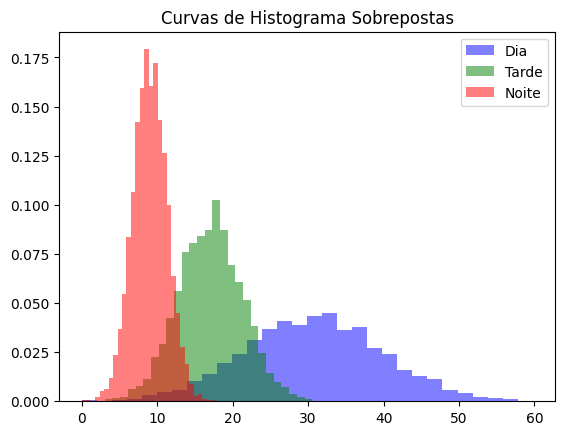

In [ ]:
# Plotar os histogramas sobrepostos
plt.hist(treino.total_day_charge, bins=30, density=True, color='blue', alpha=0.5, label='Dia')
plt.hist(treino.total_eve_charge, bins=30, density=True, color='green', alpha=0.5, label='Tarde')
plt.hist(treino.total_night_charge, bins=30, density=True, color='red', alpha=0.5, label='Noite')

# Adicionar legenda
plt.legend()

# Adicionar título
plt.title('Gasto por horario sobreposto')

# Mostrar o gráfico
plt.show()

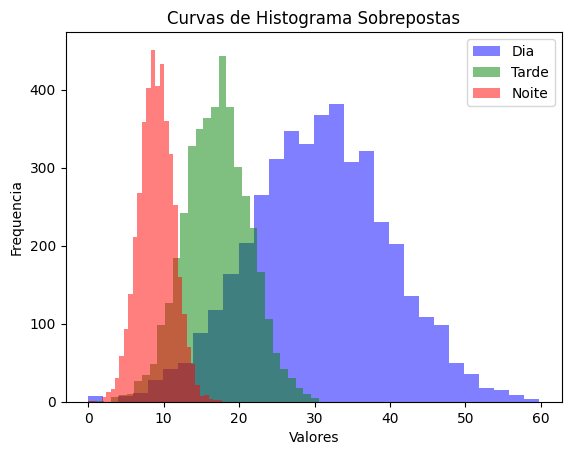

In [ ]:
# Plotar os histogramas sobrepostos
plt.hist(treino.total_day_charge, bins=30, density=False, color='blue', alpha=0.5, label='Dia')
plt.hist(treino.total_eve_charge, bins=30, density=False, color='green', alpha=0.5, label='Tarde')
plt.hist(treino.total_night_charge, bins=30, density=False, color='red', alpha=0.5, label='Noite')

# Adicionar legenda
plt.legend()

# Adicionar rótulos aos eixos x e y
plt.xlabel('Valores')
plt.ylabel('Frequencia')

# Adicionar título
plt.title('Curvas de Histograma Sobrepostas')

# Mostrar o gráfico
plt.show()

In [ ]:
treino.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


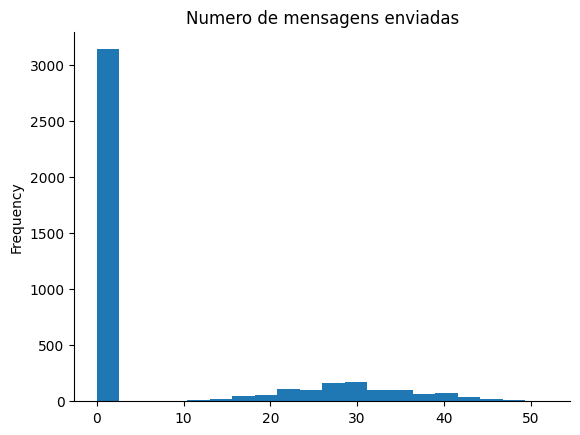

In [ ]:
from matplotlib import pyplot as plt
treino['number_vmail_messages'].plot(kind='hist', bins=20, title='Numero de mensagens enviadas')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
treino.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


Text(0, 0.5, 'Minutos')

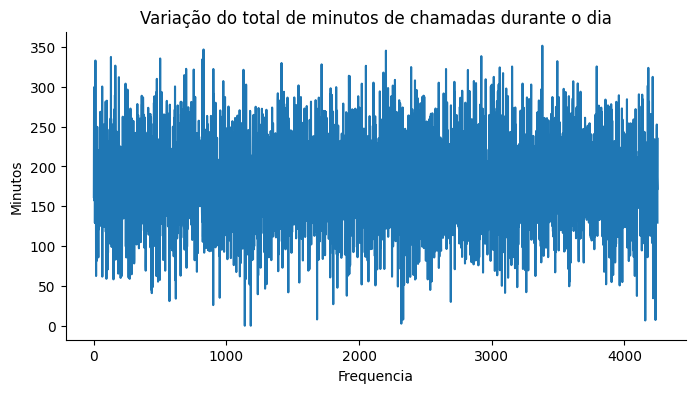

In [ ]:


from matplotlib import pyplot as plt
treino['total_day_minutes'].plot(kind='line', figsize=(8, 4), title='Variação do total de minutos de chamadas durante o dia')
plt.gca().spines[['top', 'right']].set_visible(False)

# Adicionar rótulos aos eixos x e y
plt.xlabel('Frequencia')
plt.ylabel('Minutos')

<ipython-input-39-f2d4b77902d5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(treino, x='account_length', y='churn', inner='box', palette='Dark2')


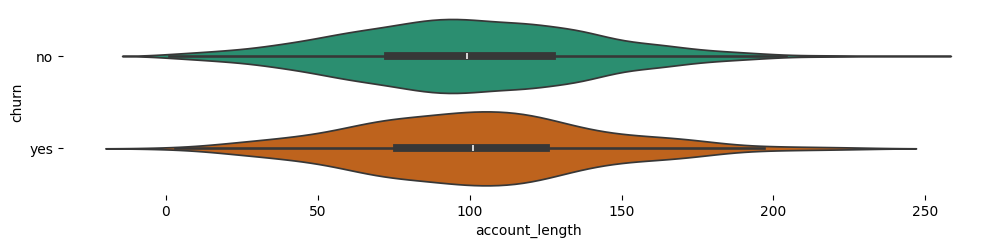

In [ ]:

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(treino['churn'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(treino, x='account_length', y='churn', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True);

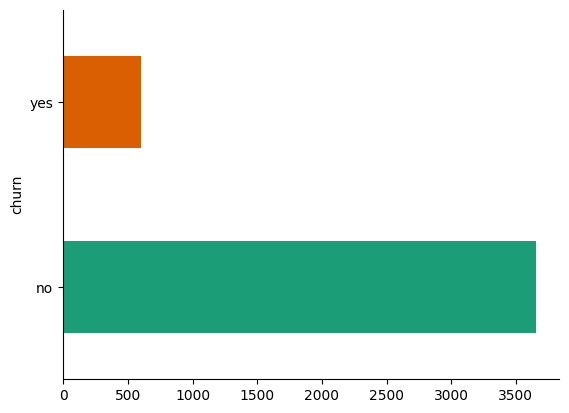

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
treino.groupby('churn').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

## Processamento de dados

In [ ]:
treino.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [ ]:
treino.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [ ]:
treino.area_code.unique()

array(['area_code_415', 'area_code_408', 'area_code_510'], dtype=object)

In [ ]:
var_categoricas = ['state','area_code','international_plan','voice_mail_plan']
var_numericas = ['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls']

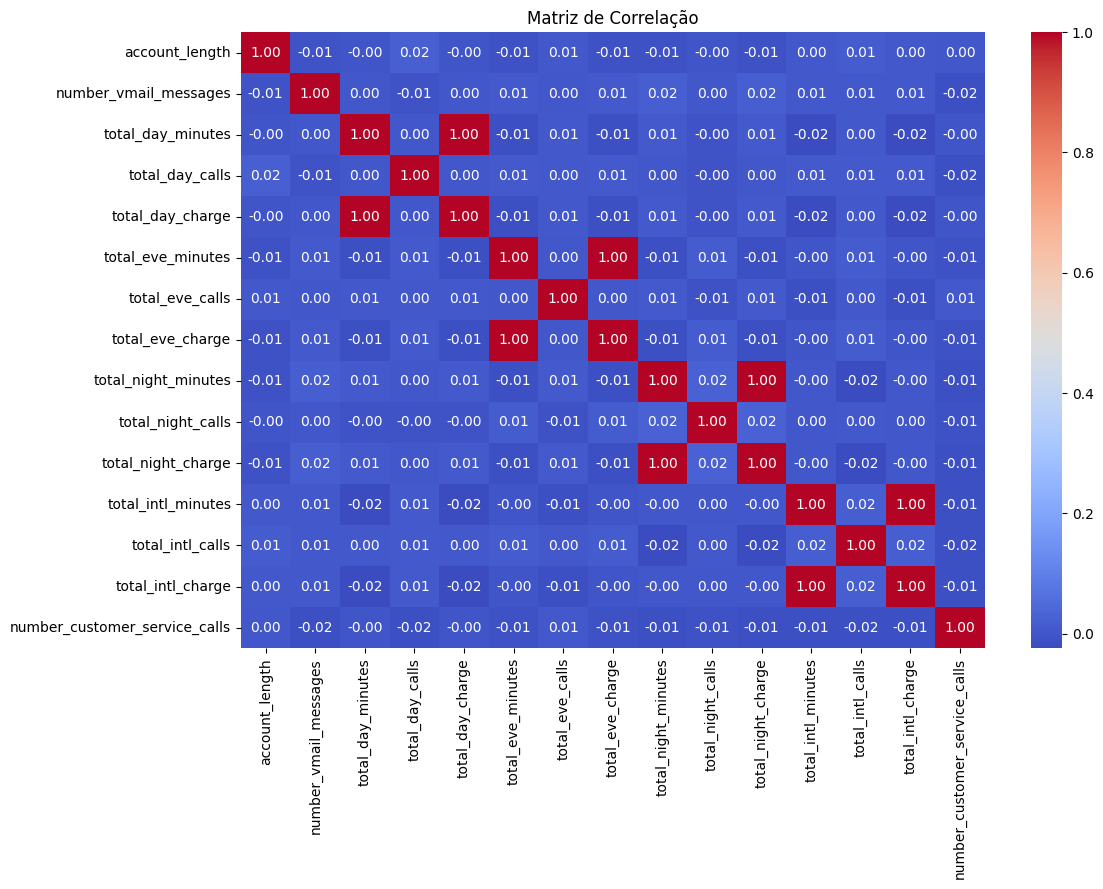

In [ ]:

# Calcular a matriz de correlação
correlation_matrix = treino[var_numericas].corr()

# Plotar o heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()


In [ ]:
treino.iloc[:,:-1]

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,area_code_415,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0
4246,WV,73,area_code_408,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3
4247,NC,75,area_code_408,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1
4248,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2


In [ ]:
# One hot encoder
treino_encoded = pd.get_dummies(treino.iloc[:,:-1], columns=var_categoricas)


In [ ]:
treino_encoded.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,state_WI,state_WV,state_WY,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
0,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,False,False,False,False,True,False,True,False,False,True
1,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,False,False,False,False,True,False,True,False,True,False
2,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,False,False,False,True,False,False,False,True,True,False
3,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,False,False,False,False,True,False,False,True,True,False
4,121,24,218.2,88,37.09,348.5,108,29.62,212.6,118,...,False,False,False,False,False,True,True,False,False,True


In [ ]:
teste_encoded.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,state_WI,state_WV,state_WY,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
1024,36,0,178.6,83,30.36,213.1,103,18.11,198.0,119,...,False,False,False,False,False,True,True,False,True,False
2177,16,0,153.2,65,26.04,229.7,90,19.52,148.2,94,...,False,False,False,False,False,True,True,False,True,False
1444,99,0,200.0,66,34.00,107.9,104,9.17,233.7,82,...,False,False,False,False,True,False,True,False,True,False
3386,159,0,168.5,80,28.65,203.9,119,17.33,199.1,126,...,False,False,False,False,False,True,True,False,True,False
3203,77,0,124.1,92,21.10,214.9,131,18.27,241.3,132,...,False,False,False,False,False,True,True,False,True,False


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Inicializar o scaler

# nao faz sentido considerar tempo e tamanhos negativos
scaler = MinMaxScaler()

# Aplicar Min-Max Scaling às variáveis numéricas
treino_minmax= treino_encoded[var_numericas].copy()

treino_minmax[var_numericas] = scaler.fit_transform(treino_encoded[var_numericas])

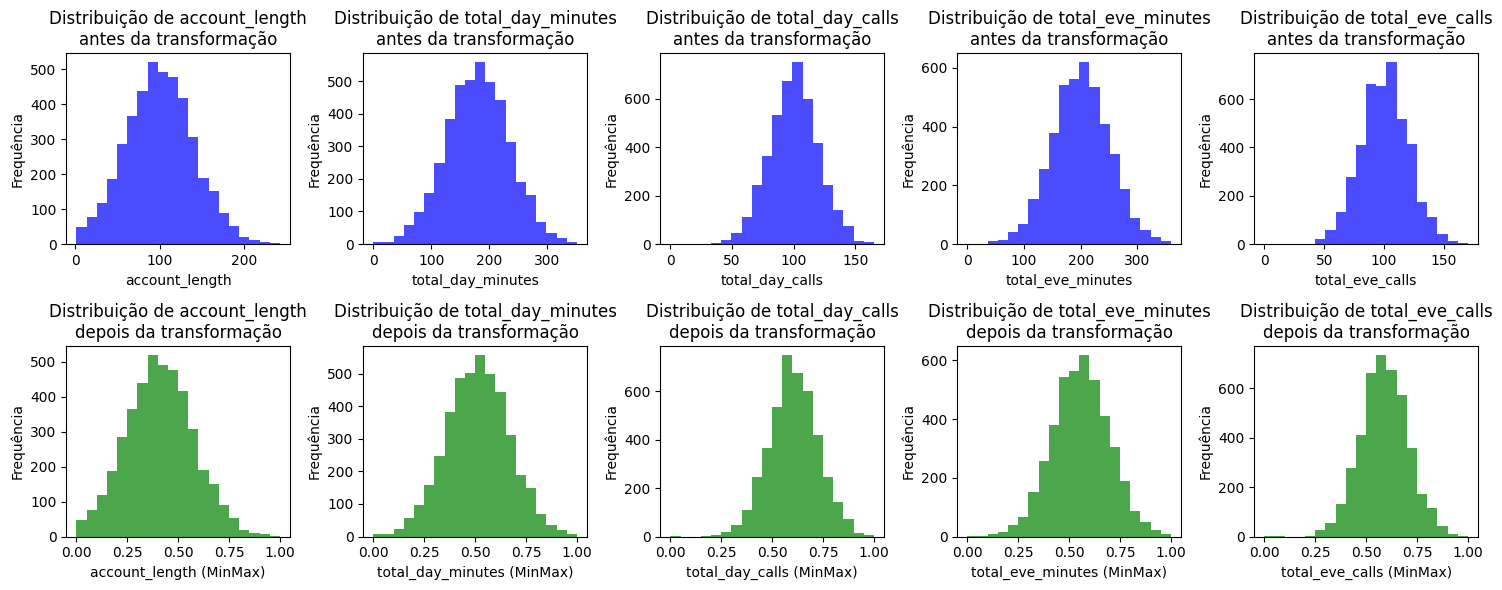

In [ ]:
import matplotlib.pyplot as plt

# Variáveis numéricas antes da transformação
plt.figure(figsize=(15, 6))

for i, col in enumerate(['account_length', 'total_day_minutes', 'total_day_calls', 'total_eve_minutes', 'total_eve_calls']):
    plt.subplot(2, 5, i+1)
    plt.hist(treino_encoded[col], bins=20, color='blue', alpha=0.7)
    plt.title(f'Distribuição de {col}\nantes da transformação')
    plt.xlabel(col)
    plt.ylabel('Frequência')

# Variáveis numéricas depois da transformação
for i, col in enumerate(['account_length', 'total_day_minutes', 'total_day_calls', 'total_eve_minutes', 'total_eve_calls']):
    plt.subplot(2, 5, i+6)
    plt.hist(treino_minmax[col], bins=20, color='green', alpha=0.7)
    plt.title(f'Distribuição de {col}\ndepois da transformação')
    plt.xlabel(col + ' (MinMax)')
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()


In [ ]:
book_treino = pd.concat([treino_minmax, treino_encoded], axis=1)
book_treino = book_treino.loc[:, ~book_treino.columns.duplicated()]


In [ ]:
book_treino = pd.concat([book_treino, treino.churn], axis=1)

In [ ]:
mapeamento = {'yes': 1, 'no': 0}
book_treino["churn"] = np.array([mapeamento[item] for item in book_treino.churn])

In [ ]:
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(book_treino.iloc[:,:-1], book_treino.churn, test_size=0.3, random_state=42)


In [ ]:
print(X_treino.shape)
print(y_treino.shape)
print(X_teste.shape)
print(y_teste.shape)



(2975, 73)
(2975,)
(1275, 73)
(1275,)


## teste modelos

In [ ]:
!pip install scikit-learn --quiet

In [ ]:
!pip install catboost --quiet

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

# F1-score
f1_scorer = make_scorer(f1_score)

# Modelos escolhidos por conviniencia
models = {
    'Árvore de Decisão': DecisionTreeClassifier(),
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier(),
    'CatBoost': CatBoostClassifier(),
    'Random Forest': RandomForestClassifier(),
}

# Grid de hiperparametros
params = {
    'Árvore de Decisão': {'max_depth': [None, 5, 10, 15]},
    'XGBoost': {'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.3]},
    'LightGBM': {'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.3]},
    'CatBoost': {'depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.3]},
    'Random Forest': {'n_estimators': [10, 25, 50], 'max_depth': [None, 5, 10, 15]},
}

# Realizar a busca em grade aleatória para cada modelo
results = {}
for name, model in models.items():
    random_search = RandomizedSearchCV(model, param_distributions=params[name], scoring=f1_scorer, cv=5, n_iter=10)
    random_search.fit(X_treino, y_treino)
    best_model = random_search.best_estimator_
    y_pred = best_model.predict(X_teste)
    report = classification_report(y_teste, y_pred)
    results[name] = {'Best Model': best_model, 'Classification Report': report}

# Exibir os resultados
for name, result in results.items():
    print(f'Modelo: {name}')
    print(f'Melhores parâmetros: {result["Best Model"]}')
    print(f'Relatório de classificação:\n{result["Classification Report"]}\n')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[LightGBM] [Info] Number of positive: 323, number of negative: 2057
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000521 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2482
[LightGBM] [Info] Number of data points in the train set: 2380, number of used features: 72
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.135714 -> initscore=-1.851352
[LightGBM] [Info] Start training from score -1.851352
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Streaming output truncated to the last 5000 lines.
75:	learn: 0.0312545	total: 487ms	remaining: 5.92s
76:	learn: 0.0308864	total: 493ms	remaining: 5.91s
77:	learn: 0.0305430	total: 499ms	remaining: 5.9s
78:	learn: 0.0301982	total: 513ms	remaining: 5.98s
79:	learn: 0.0295962	total: 519ms	remaining: 5.97s
80:	learn: 0.0285735	total: 525ms	remaining: 5.96s
81:	learn: 0.0279747	total: 531ms	remaining: 5.95s
82:	learn: 0.0274443	total: 538ms	remaining: 5.94s
83:	learn: 0.0268665	total: 544ms	remaining: 5.93s
84:	learn: 0.0262544	total: 551ms	remaining: 5.92s
85:	learn: 0.0258697	total: 557ms	remaining: 5.92s
86:	learn: 0.0252130	total: 563ms	remaining: 5.91s
87:	learn: 0.0249214	total: 569ms	remaining: 5.89s
88:	learn: 0.0247040	total: 575ms	remaining: 5.88s
89:	learn: 0.0241637	total: 581ms	remaining: 5.87s
90:	learn: 0.0239625	total: 587ms	remaining: 5.86s
91:	learn: 0.0235650	total: 593ms	remaining: 5.85s
92:	learn: 0.0229690	total: 599ms	remaining: 5.84s
93:	learn: 0.0226409	total: 605m

In [ ]:
results

{'Regressão Logística': {'Best Model': LogisticRegression(C=10),
  'Classification Report': '              precision    recall  f1-score   support\n\n       False       0.89      0.97      0.93      3652\n        True       0.59      0.25      0.35       598\n\n    accuracy                           0.87      4250\n   macro avg       0.74      0.61      0.64      4250\nweighted avg       0.85      0.87      0.85      4250\n'},
 'Árvore de Decisão': {'Best Model': DecisionTreeClassifier(max_depth=10),
  'Classification Report': '              precision    recall  f1-score   support\n\n       False       0.98      1.00      0.99      3652\n        True       1.00      0.87      0.93       598\n\n    accuracy                           0.98      4250\n   macro avg       0.99      0.93      0.96      4250\nweighted avg       0.98      0.98      0.98      4250\n'},
 'XGBoost': {'Best Model': XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, 

In [ ]:
melhor_modelo_lg = results['LightGBM']['Best Model']
melhor_modelo_tree = results['Árvore de Decisão']['Best Model']

## Light GBM

In [ ]:
melhor_modelo_lg

LGBMClassifier(max_depth=7)

In [ ]:
y_teste

1024    0
2177    0
1444    0
3386    0
3203    0
       ..
2357    1
3903    1
2378    0
883     0
1091    0
Name: churn, Length: 1275, dtype: int64

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 403, number of negative: 2572
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000584 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2516
[LightGBM] [Info] Number of data points in the train set: 2975, number of used features: 73
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.135462 -> initscore=-1.853503
[LightGBM] [Info] Start training from score -1.853503
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

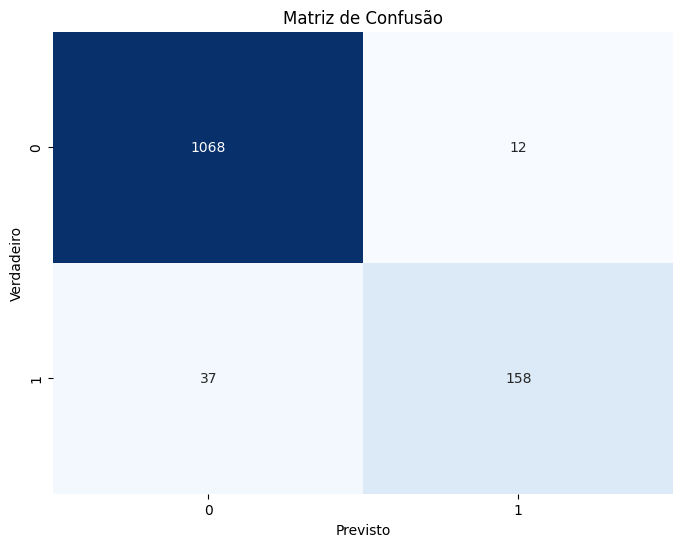


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1080
           1       0.93      0.81      0.87       195

    accuracy                           0.96      1275
   macro avg       0.95      0.90      0.92      1275
weighted avg       0.96      0.96      0.96      1275

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
AUC: 0.909192782526116
F1-score: 0.8657534246575342


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, f1_score


melhor_modelo_lg.fit(X_treino, y_treino)

# Fazer previsões nos dados de treinamento e teste
y_pred_train_rf = melhor_modelo_lg.predict(X_treino)
y_pred_test_rf = melhor_modelo_lg.predict(X_teste)

# treino
print("Métricas para os dados de treinamento:")
print("Matriz de Confusão:")
print(confusion_matrix(y_treino, y_pred_train_rf))

print("\nRelatório de Classificação:")
print(classification_report(y_treino, y_pred_train_rf))
print("AUC:", roc_auc_score(y_treino, melhor_modelo_rf.predict_proba(X_treino)[:,1]))
print("F1-score:", f1_score(y_treino, y_pred_train_rf))

# teste
print("\nMétricas para os dados de teste:")
print("Matriz de Confusão:")
print(confusion_matrix(y_teste, y_pred_test_rf))
cm = confusion_matrix(y_teste, y_pred_test_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão')
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()
print("\nRelatório de Classificação:")
print(classification_report(y_teste, y_pred_test_rf))
print("AUC:", roc_auc_score(y_teste, melhor_modelo_rf.predict_proba(X_teste)[:,1]))
print("F1-score:", f1_score(y_teste, y_pred_test_rf))


## Árvore de Decisão

In [ ]:
melhor_modelo_tree

DecisionTreeClassifier(max_depth=5)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 403, number of negative: 2572
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001273 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2516
[LightGBM] [Info] Number of data points in the train set: 2975, number of used features: 73
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.135462 -> initscore=-1.853503
[LightGBM] [Info] Start training from score -1.853503
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

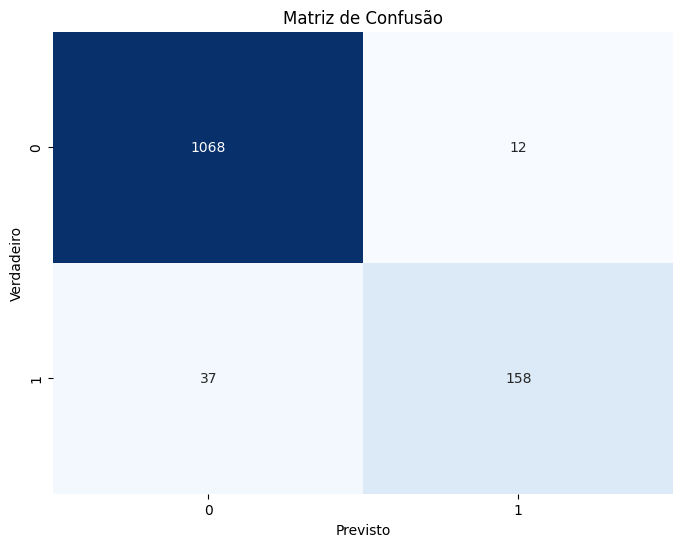


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1080
           1       0.93      0.81      0.87       195

    accuracy                           0.96      1275
   macro avg       0.95      0.90      0.92      1275
weighted avg       0.96      0.96      0.96      1275

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
AUC: 0.909192782526116
F1-score: 0.8657534246575342


In [ ]:
melhor_modelo_rf.fit(X_treino, y_treino)

# Fazer previsões nos dados de treinamento e teste
y_pred_train_rf = melhor_modelo_rf.predict(X_treino)
y_pred_test_rf = melhor_modelo_rf.predict(X_teste)

# treino
print("Métricas para os dados de treinamento:")
print("Matriz de Confusão:")
print(confusion_matrix(y_treino, y_pred_train_rf))


print("\nRelatório de Classificação:")
print(classification_report(y_treino, y_pred_train_rf))
print("AUC:", roc_auc_score(y_treino, melhor_modelo_rf.predict_proba(X_treino)[:,1]))
print("F1-score:", f1_score(y_treino, y_pred_train_rf))

# teste
print("\nMétricas para os dados de teste:")
print("Matriz de Confusão:")
print(confusion_matrix(y_teste, y_pred_test_rf))
cm = confusion_matrix(y_teste, y_pred_test_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão')
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()
print("\nRelatório de Classificação:")
print(classification_report(y_teste, y_pred_test_rf))
print("AUC:", roc_auc_score(y_teste, melhor_modelo_rf.predict_proba(X_teste)[:,1]))
print("F1-score:", f1_score(y_teste, y_pred_test_rf))

## Subimisão

In [ ]:
test = pd.read_csv("/content/drive/MyDrive/Santander Coders/Machine Learn 1/test.csv")

In [ ]:
test.drop(columns=['id'])

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,GA,130,area_code_415,no,no,0,119.4,99,20.30,226.3,97,19.24,202.7,111,9.12,11.3,7,3.05,0
746,WA,73,area_code_408,no,no,0,177.2,118,30.12,270.5,84,22.99,241.8,112,10.88,12.3,2,3.32,3
747,WV,152,area_code_415,no,no,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
748,DC,61,area_code_415,no,no,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1


In [ ]:
test_encoded = pd.get_dummies(test, columns=var_categoricas)

from sklearn.preprocessing import MinMaxScaler

# Inicializar o scaler

# nao faz sentido considerar tempo e tamanhos negativos
scaler = MinMaxScaler()

# Aplicar Min-Max Scaling às variáveis numéricas
test_minmax= test_encoded[var_numericas].copy()

test_minmax[var_numericas] = scaler.fit_transform(test_encoded[var_numericas])




In [ ]:
book_test = pd.concat([test_minmax, test_encoded], axis=1)
book_test = book_test.loc[:, ~book_test.columns.duplicated()]


In [ ]:
book_test = book_test.drop(columns=['id'])

In [ ]:
book_teste.shape

(4250, 73)